In [1]:
%matplotlib inline
import pymongo
import re
from datetime import datetime
from stop_words import get_stop_words
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
s=get_stop_words('english')+["'","dont","may","will","says","new","back",'',"go","one","can","big","first",'make','get','still','gets',"say"]
pd.set_option("display.max_rows",30)

In [2]:
connection=pymongo.MongoClient("mongodb://localhost")['NPR']['NPR']
df=pd.DataFrame(list(connection.find()))


In [4]:
df['Date'] = df.apply(lambda row: datetime(row['year'], row['month'], row['day']), axis=1)
idf=df.set_index('Date')
idf.drop(['year','month','day','_id'],axis=1,inplace=True)

year_count=idf.groupby(idf.index.year).count()



In [6]:
titles=idf.ix[:,0]
title_list=titles.str.lower().str.replace("[^\w\s#]",'').str.split().apply(pd.Series, 1).stack()
title_list.index= title_list.index.droplevel(-1)
result=title_list[~title_list.isin(s)].to_frame()
result.columns=['word']




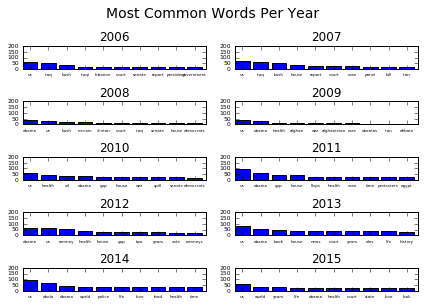

In [9]:
year_range=np.arange(2006,2016)
for year in year_range:
    words=result[result.index.year==year]
    word_count=words['word'].value_counts()
    ax=plt.subplot(5,2,np.where(year_range==year)[0][0]+1)
    ax.bar(np.arange(10),word_count[:10])
    ax.set_title(str(year))
    ax.set_yticks(np.arange(0,250,50), minor=False)
    ax.set_xticks(np.arange(10)+.4, minor=False)
    ax.set_xticklabels(tuple(word_count.index[:10]), fontdict=None, minor=False)
    ax.tick_params(axis='y', labelsize=6)
    ax.tick_params(axis='x', labelsize=4)
    
plt.tight_layout()
plt.suptitle("Most Common Words Per Year", fontsize=14, y=1.05)
plt.savefig('Year.pdf')
    

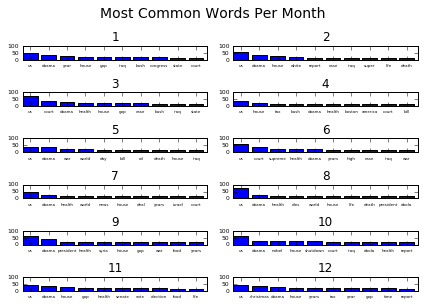

In [10]:
month_range=np.arange(1,13)
for month in month_range:
    words=result[result.index.month==month]
    word_count=words['word'].value_counts()
    ax=plt.subplot(6,2,np.where(month_range==month)[0][0]+1)
    ax.bar(np.arange(10),word_count[:10])
    ax.set_title(str(month))
    ax.set_yticks(np.arange(0,150,50), minor=False)
    ax.set_xticks(np.arange(10)+.4, minor=False)
    ax.set_xticklabels(tuple(word_count.index[:10]), fontdict=None, minor=False)
    ax.tick_params(axis='y', labelsize=6)
    ax.tick_params(axis='x', labelsize=4)
    
plt.tight_layout()
plt.suptitle("Most Common Words Per Month", fontsize=14, y=1.05)
plt.savefig('month.pdf')

In [11]:
number_words=result[result.word.str.contains(r'\d')]['word']
number_words.index=number_words.index.year


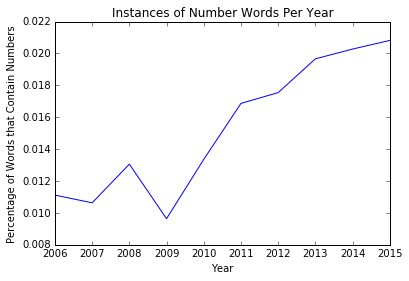

In [12]:
amount_of_nums=number_words.groupby(number_words.index).count()
words_per_year=result.groupby(result.index.year).count()
num_percentage=amount_of_nums.div(words_per_year.word)
ax=num_percentage.plot(title='Instances of Number Words Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Words that Contain Numbers')
ax.ticklabel_format(useOffset=False)
fig = ax.get_figure()
fig.savefig('Num_Instances.pdf')

In [13]:
year_2006=result[result.index.year==2006]['word'].value_counts()
year_2014=result[result.index.year==2014]['word'].value_counts()



In [14]:
slice_2006=year_2006[~year_2006.index.isin(year_2014.index)]
slice_2014=year_2014[~year_2014.index.isin(year_2006.index)]
slice_2006[:]=0
slice_2014[:]=0
year_2014=year_2014.append(slice_2006)[:]+1
year_2006=year_2006.append(slice_2014)[:]+1
word_change=(year_2014-year_2006).sort_values(ascending=False)
percent_change=word_change.div(year_2006).sort_values(ascending=False)

In [15]:
percent_change

ebola        71.000000
obama        41.000000
food         31.000000
2014         27.000000
kids         26.000000
women        26.000000
like         26.000000
book         23.000000
ukraine      23.000000
just         22.000000
listen       22.000000
5            21.000000
concert      18.000000
family       18.000000
tech         18.000000
               ...    
shift        -0.833333
cheney       -0.857143
plot         -0.857143
militia      -0.857143
ports        -0.857143
rumsfeld     -0.857143
hezbollah    -0.857143
darfur       -0.875000
katrina      -0.875000
launch       -0.875000
mideast      -0.888889
bush         -0.900000
enron        -0.909091
saddam       -0.923077
lebanon      -0.952381
Name: word, dtype: float64

In [16]:
result.index=result.index.year
presidents=['obama','bush','clinton']
trending=['ebola','women','science','data','food','isis']
falling=['iraq','saddam','enron','darfar','rumsfeld']







In [17]:
def plot_from_list(word_list,title):
    ax=plt.subplot(111)
    for word in word_list:
        values=result[result.word==word]
        counts=values.groupby(values.index).count()
        counts=counts.reindex(np.arange(2006,2016)).fillna(0)
        ax.plot(counts.index,counts,label=word)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Words')    
    plt.legend(loc='best')
    ax.ticklabel_format(useOffset=False)
    plt.savefig(title+'.pdf')

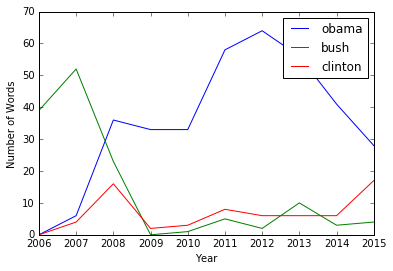

In [18]:
plot_from_list(presidents,'Presidents')

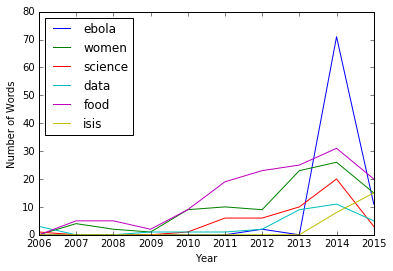

In [19]:
plot_from_list(trending,'Trending')

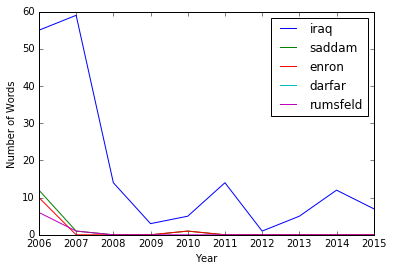

In [20]:
plot_from_list(falling,'Falling')